In [1]:
from pathlib import Path
from tkinter import Tk
from tkinter.filedialog import askopenfilenames
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as plticker

idx = pd.IndexSlice

# Define automatic naming format from file_paths
def get_name(file_path,data_type):
    name = file_path.stem.split("_")
    if data_type == 'avg':
        name = name[3]+'_'+name[4]
    elif data_type == 'indv':
        name = name[3]+'_'+name[5]
        
    return name

# Define axis labels based on parameter
def gen_param_label(param):
    param_dict = {
        'mAh':'[mAh]',
        'mass':'[mAh/g]',
        'areal':r'$\mathrm{[mAh/cm^2]}$',
        'volume':r'$\mathrm{[mAh/cm^3]$'}
    
    return param_dict[param]

In [2]:
# Open file dialog
root = Tk()
root.attributes("-topmost", True)
root.withdraw()  # stops root window from appearing
file_paths = askopenfilenames(title="Select files",
                              filetypes=[("Comma-separated values", "*.csv")])  # "Open" dialog box and return the selected path

# Convert filepaths to pathlib format
filez = []
for file in file_paths:
    file = Path(file)
    filez.append(file)
    
file_paths = filez

In [3]:
# Generate 'names' and 'param' dictionaries from file_paths
# read_csv to dataframe
names={}
params = {}
df=[]
for i, file_path in enumerate(file_paths):
    if 'avg' in file_paths[i].stem:
        data_type = 'avg'
    else:
        data_type = 'indv'
    
    name = get_name(file_paths[i],data_type)
    names[i] = name
    
    df_imp = pd.read_csv(file_paths[i],header=[1,2],index_col=[0,1])
    df_imp = pd.concat([df_imp], axis=1, keys=[i])
    
    df.append(df_imp)

    params[i] = df_imp.columns.get_level_values(1)[1]
      
df = pd.concat(df, axis=1)
df.sort_index(inplace=True)

for cell in names:
    print(cell, '->', names[cell], '->', params[cell])

0 -> WMG_201214 -> mass


In [4]:
### df for Energy Capacity ###

# Filters
posCC = [1,6]
posCV = [2,7]
negCC = [4,9]
cycles = range(1,len(posCC)+1)

# Create new dataframe
df_new = []
df_list = []
for cell in names:
    df_new = df.loc[idx[posCC,:],idx[cell,params[cell],:]].copy()
    df_new['cycle'] = list(cycles)
    df_new.reset_index()
    df_new.set_index('cycle',inplace=True)
    df_new.columns.set_levels(['p_cap_CC'],level=2,inplace=True)
        
    df_new2 = df.loc[idx[posCV,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'p_cap_CV']=df_new2
    
    df_new3 = df.loc[idx[posCC,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'p_cap_Tot']=df_new2+df_new3
    
    df_new4 = df.loc[idx[negCC,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'n_cap_CC']=df_new4
    
    df_list.append(df_new)

df_plot_energy = pd.concat(df_list, axis=1)

In [5]:
### df for C-rate test ###

# Filters
posCC = [11,16,21,26,33,38,43]
posCV = [12,17,22,27,34,39,44]
negCC = [14,19,24,29,31,36,41]
cycles = range(1,len(posCC)+1)

# Create new dataframe
df_new = []
df_list = []
for cell in names:
    df_new = df.loc[idx[posCC,:],idx[cell,params[cell],:]].copy()
    df_new['cycle'] = list(cycles)
    df_new.reset_index()
    df_new.set_index('cycle',inplace=True)
    df_new.columns.set_levels(['p_cap_CC'],level=2,inplace=True)
        
    df_new2 = df.loc[idx[posCV,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'p_cap_CV']=df_new2
    
    df_new3 = df.loc[idx[posCC,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'p_cap_Tot']=df_new2+df_new3
    
    df_new4 = df.loc[idx[negCC,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'n_cap_CC']=df_new4
    
    df_list.append(df_new)

df_plot_rate = pd.concat(df_list, axis=1)

In [6]:
### df for Degradation test ###

# Filters
posCC = [50,55,60,65,70,75,80,85,90,95,100,105,112,117,122,127,132,137,142,147,152,157,162,169]
posCV = [x+1 for x in posCC]
negCC = [x+3 for x in posCC]
cycles = range(1,len(posCC)+1)

# Create new dataframe
df_new = []
df_list = []
for cell in names:
    df_new = df.loc[idx[posCC,:],idx[cell,params[cell],:]].copy()
    df_new['cycle'] = list(cycles)
    df_new.reset_index()
    df_new.set_index('cycle',inplace=True)
    df_new.columns.set_levels(['p_cap_CC'],level=2,inplace=True)
        
    df_new2 = df.loc[idx[posCV,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'p_cap_CV']=df_new2
    
    df_new3 = df.loc[idx[posCC,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'p_cap_Tot']=df_new2+df_new3
    
    df_new4 = df.loc[idx[negCC,:],idx[cell,params[cell],:]].to_numpy()
    df_new[cell,params[cell],'n_cap_CC']=df_new4
    
    df_list.append(df_new)

df_plot_deg = pd.concat(df_list, axis=1)

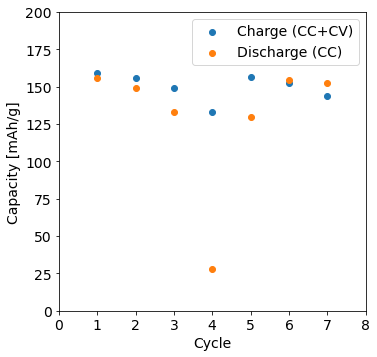

In [33]:
##### Set plot DataFrame
df_p = df_plot_rate

# Set x upper bound
upper = len(df_p.index)+1

# Create figure and axes
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(5.5, 5.5))

# Params
ax.set_ylim(ymin=0, ymax=200)
ax.set_xlim(xmin=0, xmax=upper)

y_values = [df_p[cell,params[cell],'p_cap_CC'], 
            df_p[cell,params[cell],'p_cap_Tot'], 
            df_p[cell,params[cell],'n_cap_CC']]

y_values = [df_p[cell,params[cell],'p_cap_Tot'], 
            df_p[cell,params[cell],'n_cap_CC']]

# Plot cycle data
for y in y_values:
    for cell in names:
        x = df_p.index
        if y.name[2] + '_std' in df_p[cell][params[cell]].columns:
            yerr = df_p.loc[idx[:, :],idx[cell, params[cell], y.name[2] + '_std']]
            plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=4, elinewidth=2, markeredgewidth=2, label = names[cell] + '_' + y.name[2])    
        else:
            plt.scatter(x, y, label = names[cell] + '_' + y.name[2])
        
loc = plticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
    
plt.xlabel("Cycle")
plt.ylabel('Capacity '+gen_param_label(params[0]))

leg = plt.legend(loc='best')
leg.get_texts()[0].set_text('Charge (CC+CV)')
leg.get_texts()[1].set_text('Discharge (CC)')

plt.savefig(file_paths[cell].parent.joinpath('{}_{}.svg'.format('rate_cycles',names[cell])),
            format='svg', 
            dpi=600, 
            bbox_inches = 'tight')
plt.show()

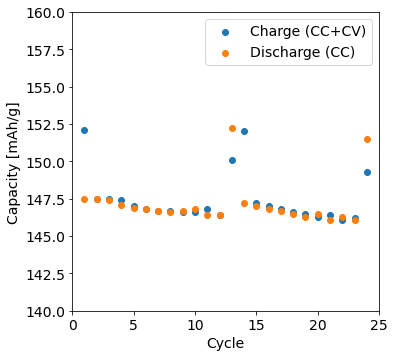

In [34]:
##### Set plot DataFrame
df_p = df_plot_deg

# Set x upper bound
upper = len(df_p.index)+1

# Create figure and axes
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(5.5, 5.5))

# Params
ax.set_ylim(ymin=140, ymax=160)
ax.set_xlim(xmin=0, xmax=upper)

y_values = [df_p[cell,params[cell],'p_cap_CC'], 
            df_p[cell,params[cell],'p_cap_Tot'], 
            df_p[cell,params[cell],'n_cap_CC']]

y_values = [df_p[cell,params[cell],'p_cap_Tot'], 
            df_p[cell,params[cell],'n_cap_CC']]

# Plot cycle data
for y in y_values:
    for cell in names:
        x = df_p.index
        if y.name[2] + '_std' in df_p[cell][params[cell]].columns:
            yerr = df_p.loc[idx[:, :],idx[cell, params[cell], y.name[2] + '_std']]
            plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=4, elinewidth=2, markeredgewidth=2, label = names[cell] + '_' + y.name[2])    
        else:
            plt.scatter(x, y, label = names[cell] + '_' + y.name[2])
        
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
    
plt.xlabel("Cycle")
plt.ylabel('Capacity '+gen_param_label(params[0]))

leg = plt.legend(loc='best')
leg.get_texts()[0].set_text('Charge (CC+CV)')
leg.get_texts()[1].set_text('Discharge (CC)')

plt.savefig(file_paths[cell].parent.joinpath('{}_{}.svg'.format('deg_cycles',names[cell])),
            format='svg', 
            dpi=600, 
            bbox_inches = 'tight')
plt.show()